### Compreendendo os objetivos

<img src="houses-prices.png" alt="Imagem do houses Price" width="400">

**Objetivos**

Precisamos prever o valor dos preços com base nas informações das casas. Ou seja, sua função é prever o preço de venda de cada casa. Para cada ID no conjunto de teste, você deve prever o valor da variável SalePrice. 

Isso vai ajudar pessoas que querem vender suas casas e identificarem os preços com base nas características que serão informadas a uma corretora de imóveis.

**Habilidades práticas**

- Engenharia de recursos criativos
- Técnicas avançadas de regressão, como floresta aleatória e aumento de gradiente

**Métrica**

As propostas são avaliadas com base na Raiz do Erro Quadrático Médio (RMSE),  entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (A utilização de logaritmos significa que erros na previsão de casas caras e baratas afetarão o resultado igualmente.)

### Compreendendo os Dados

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')

#### Conhecendo o DataSet

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Seleciona todas as colunas numéricas
numeric_features = df_train.select_dtypes(include=np.number).columns.tolist()

# Seleciona todas as colunas categóricas
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variáveis Numéricas:", numeric_features)
print("Variáveis Categóricas:", categorical_features)

Variáveis Numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Variáveis Categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firep

In [7]:
# Conta a quantidade de colunas de cada tipo
num_numeric = len(numeric_features)
num_categorical = len(categorical_features)

print(f"Total de colunas numéricas: {num_numeric}")
print(f"Total de colunas categóricas: {num_categorical}")

Total de colunas numéricas: 38
Total de colunas categóricas: 43


In [8]:
total_cols = num_numeric + num_categorical
print(f"Proporção de colunas numéricas: {num_numeric/total_cols:.2%}")
print(f"Proporção de colunas categóricas: {num_categorical/total_cols:.2%}")

Proporção de colunas numéricas: 46.91%
Proporção de colunas categóricas: 53.09%


In [9]:
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Criar um dicionário com a contagem de categorias únicas por coluna categórica
category_counts = {col: df_train[col].nunique(dropna=True) for col in categorical_features}

# Mostrar resultado
for col, count in category_counts.items():
    if count > 6:
        print(f"{col}: {count} categorias únicas")


Neighborhood: 25 categorias únicas
Condition1: 9 categorias únicas
Condition2: 8 categorias únicas
HouseStyle: 8 categorias únicas
RoofMatl: 8 categorias únicas
Exterior1st: 15 categorias únicas
Exterior2nd: 16 categorias únicas
Functional: 7 categorias únicas
SaleType: 9 categorias únicas


#### Visualizando os Dados

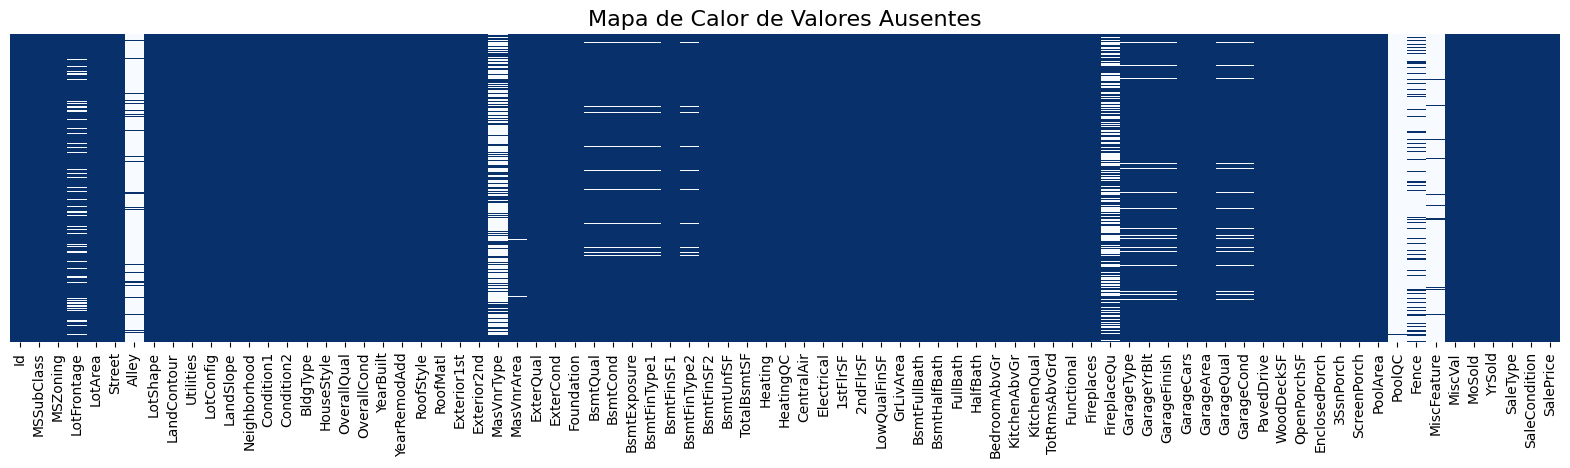

In [10]:
# Visualizando valores ausentes
import seaborn as sns
plt.figure(figsize=(20, 4))
sns.heatmap(df_train.isnull(), cbar=False, cmap='Blues_r', yticklabels=False)
plt.title('Mapa de Calor de Valores Ausentes', fontsize=16)
plt.show()

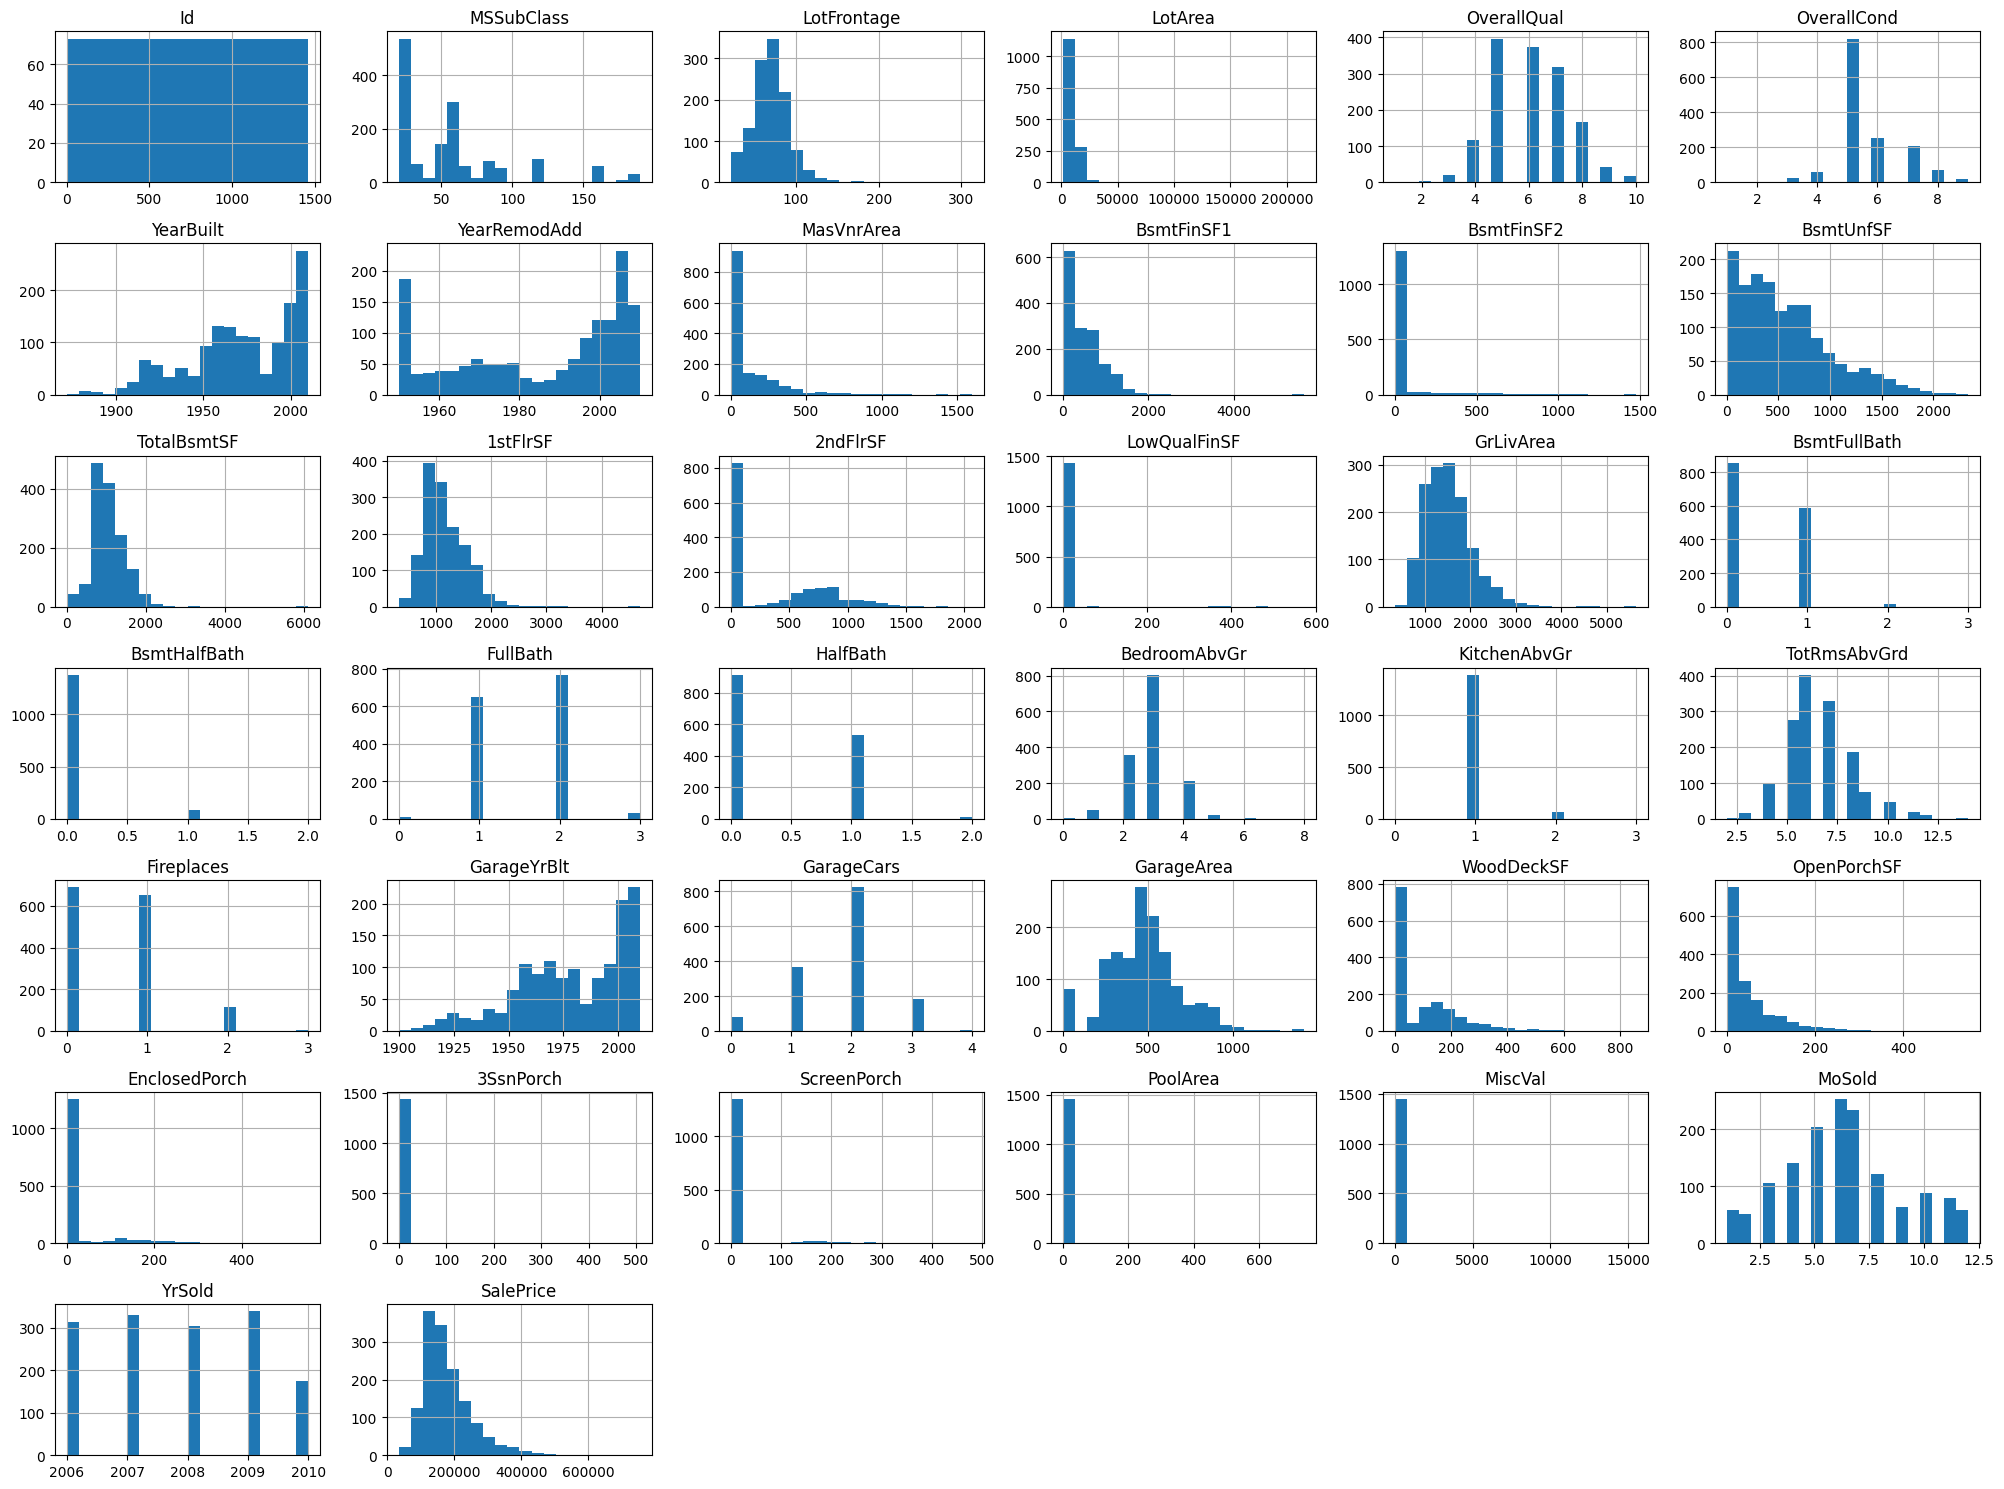

In [11]:
import matplotlib.pyplot as plt

df_train.hist(bins=20, figsize=(20,15))
plt.tight_layout()
plt.show()

/var/folders/hd/4kr701xd78l014z49lq6j6j40000gn/T/ipykernel_8989/1907151194.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Blues')
/var/folders/hd/4kr701xd78l014z49lq6j6j40000gn/T/ipykernel_8989/1907151194.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Blues')
/var/folders/hd/4kr701xd78l014z49lq6j6j40000gn/T/ipykernel_8989/1907151194.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.count

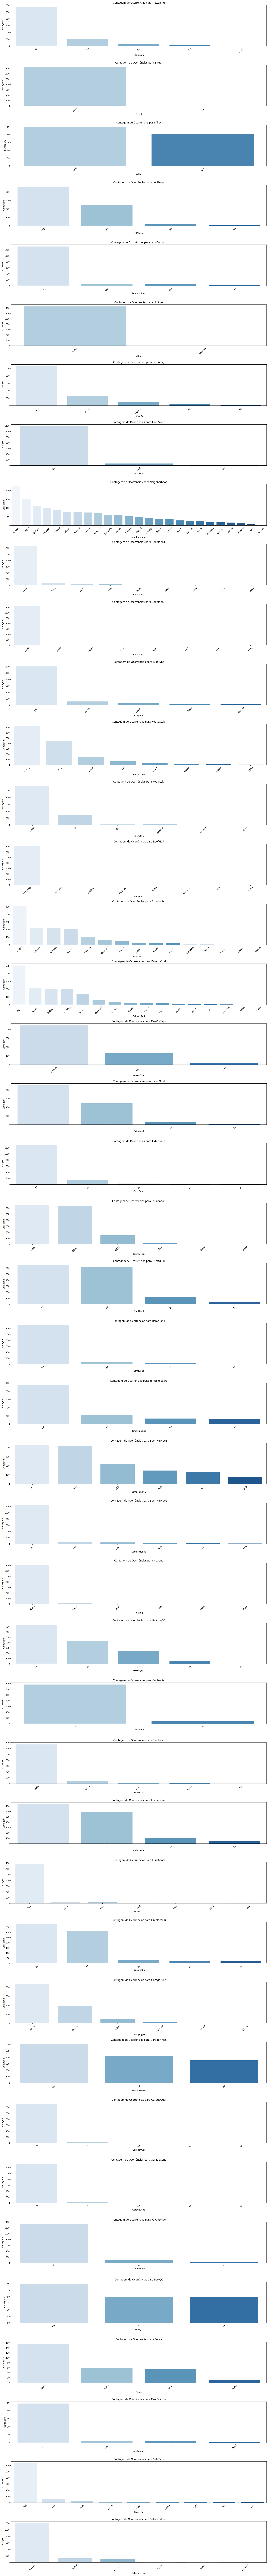

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame se chama df_train
# Filtra as colunas categóricas, pode ser pelas colunas 'category' ou 'object'
categorical_cols = df_train.select_dtypes(include=['category', 'object']).columns.tolist()

# Ajusta o tamanho da figura para mostrar múltiplos gráficos
plt.figure(figsize=(18, len(categorical_cols)*4))

# Loop para criar um gráfico para cada variável categórica
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Blues')
    plt.title(f'Contagem de Ocorrências para {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [13]:
df_train['SalePrice'].mean()

np.float64(180921.19589041095)

Verificando a variavél alvo: **SalePrice**

In [14]:
# Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

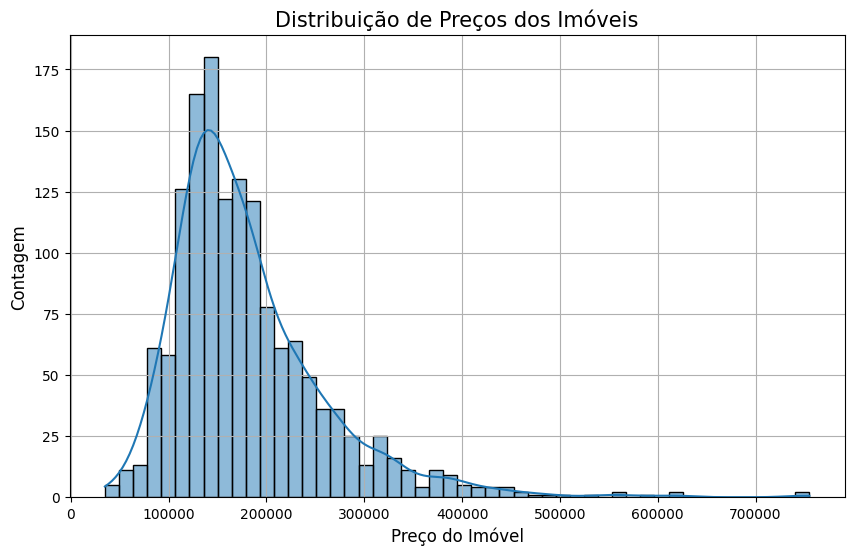

In [15]:
# A distribuição dos preços
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], bins=50, kde=True)
plt.title('Distribuição de Preços dos Imóveis', fontsize=15)
plt.xlabel('Preço do Imóvel', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.grid(True)
plt.show()

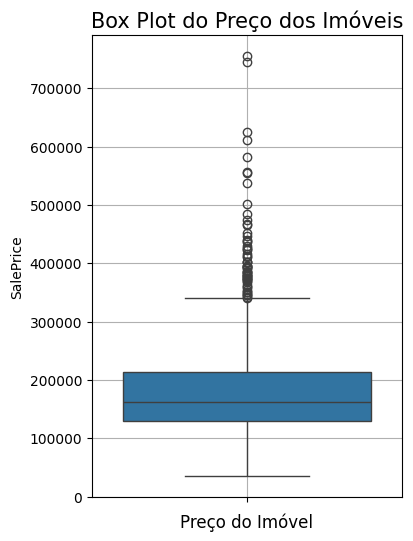

In [16]:
# A média e os outliers
plt.figure(figsize=(4, 6))
sns.boxplot(y=df_train['SalePrice'])
plt.title('Box Plot do Preço dos Imóveis', fontsize=15)
plt.xlabel('Preço do Imóvel', fontsize=12)
plt.grid(True)
plt.show()

Fazendo uma visualização da variavel alvo com algumas colunas

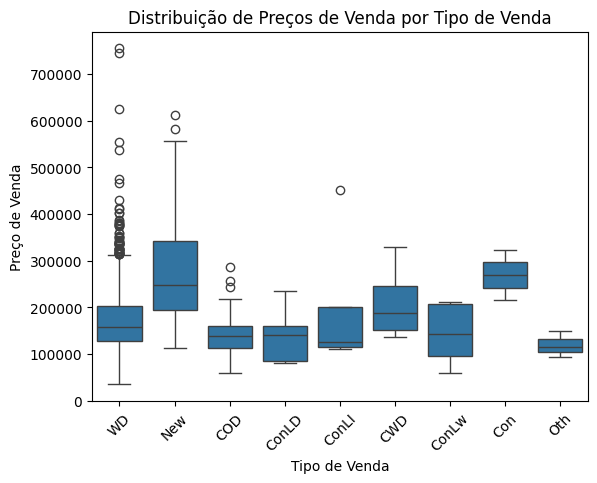

In [17]:
# plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleType', y='SalePrice', data=df_train)
plt.title('Distribuição de Preços de Venda por Tipo de Venda')
plt.xlabel('Tipo de Venda')
plt.ylabel('Preço de Venda')
plt.xticks(rotation=45)
plt.show()

/var/folders/hd/4kr701xd78l014z49lq6j6j40000gn/T/ipykernel_8989/634603544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='OverallQual', y='SalePrice', data=df_train, palette='Blues', inner='quartile')


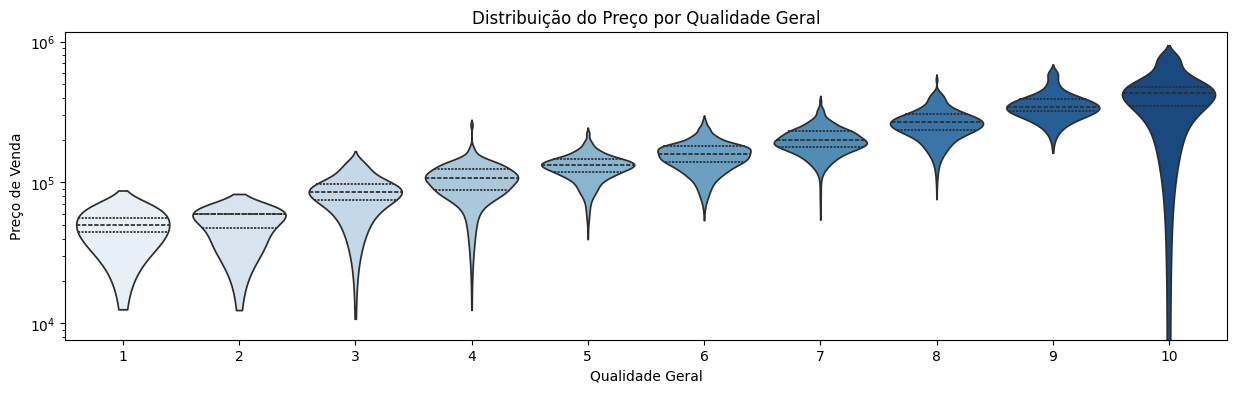

In [18]:
plt.figure(figsize=(15, 4))
sns.violinplot(x='OverallQual', y='SalePrice', data=df_train, palette='Blues', inner='quartile')
plt.title('Distribuição do Preço por Qualidade Geral')
plt.xlabel('Qualidade Geral')
plt.ylabel('Preço de Venda')
plt.yscale('log')
plt.show()

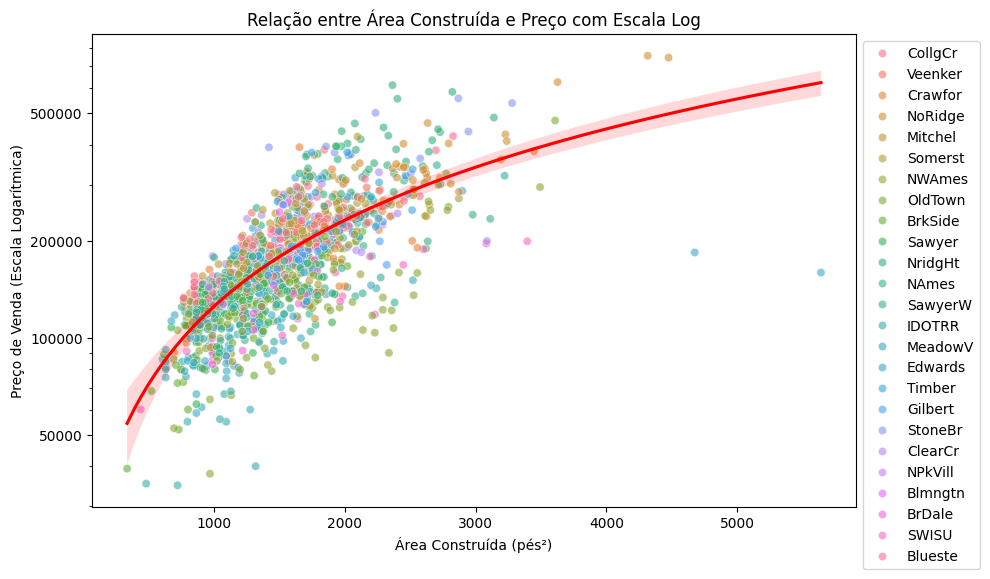

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, alpha=0.6, hue='Neighborhood')
plt.yscale('log')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.yticks([50000, 100000, 200000, 500000, 1000000])

sns.regplot(x='GrLivArea', y='SalePrice', data=df_train, scatter=False, color='red')

plt.xlabel('Área Construída (pés²)')
plt.ylabel('Preço de Venda (Escala Logarítmica)')
plt.title('Relação entre Área Construída e Preço com Escala Log')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

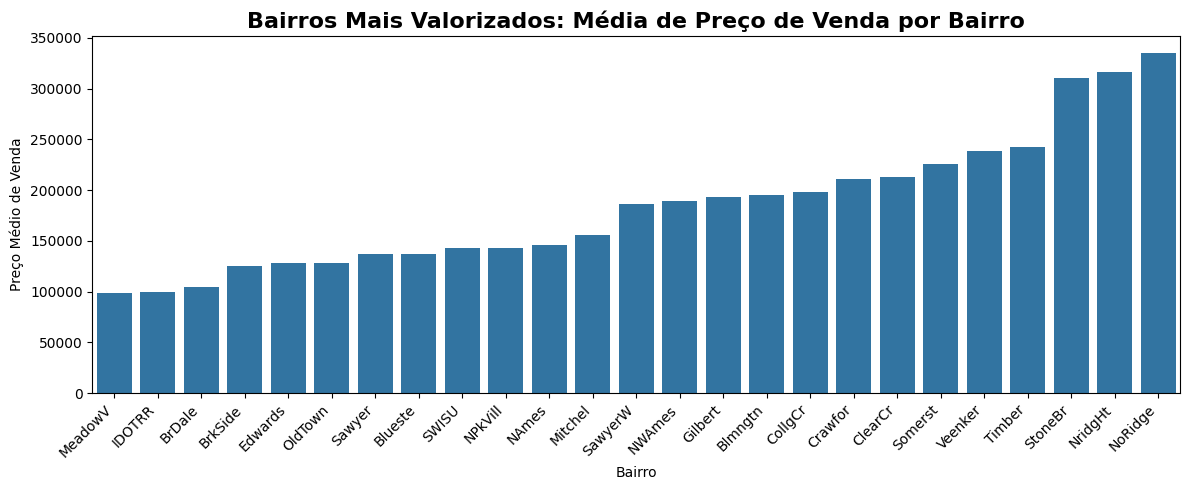

In [20]:
# Calcula as médias
mean_prices = df_train.groupby('Neighborhood')['SalePrice'].mean().reset_index()

# Ordena o DataFrame pelo preço médio em ordem crescente
mean_prices_sorted = mean_prices.sort_values('SalePrice', ascending=True)

plt.figure(figsize=(12, 5))

# Passa a ordem ordenada para o parâmetro order usando os bairros ordenados
sns.barplot(x='Neighborhood', y='SalePrice', data=mean_prices_sorted,
            order=mean_prices_sorted['Neighborhood'])

plt.xticks(rotation=45, ha='right')
plt.ylabel('Preço Médio de Venda')
plt.xlabel('Bairro')
plt.title('Bairros Mais Valorizados: Média de Preço de Venda por Bairro', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


<Axes: >

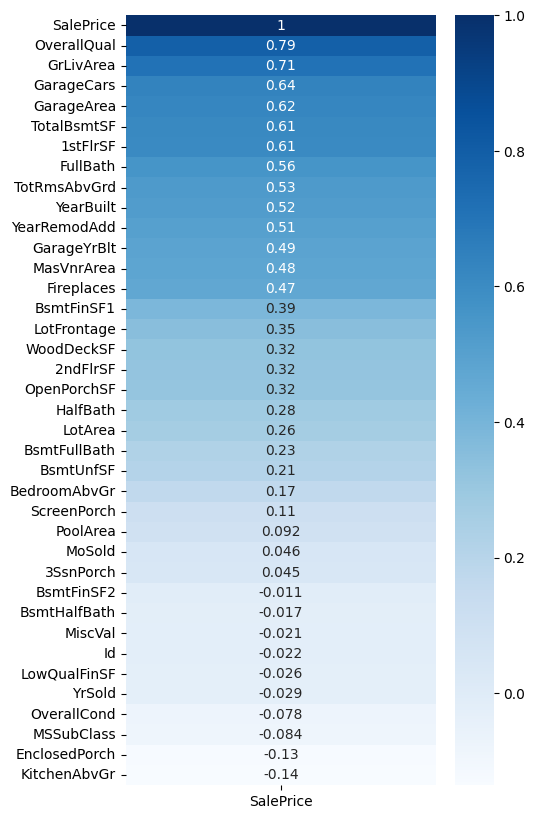

In [21]:
# Descobrir relações numéricas
plt.figure(figsize=(5, 10))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap="Blues")

### Tratando os Dados

In [22]:
from sklearn.preprocessing import OneHotEncoder

Otimizando as Colunas categóricas

[ FEITO ] Ajustar tipos (ex: definir ‘category’, ‘object’ ou ‘int’ onde precisa)

[ FEITO ] Tratar valores faltantes

[ FEITO ] Mapear variáveis binárias simples (ex: Street) para 0/1

COLUNAS CATEGORICAS

- 'MSZoning' - FEITO
- 'Street' - FEITO
- 'Alley' - FEITO
- 'LotShape' - FEITO
- 'LandContour' - FEITO
- 'Utilities' - N/A
- 'LotConfig' - FEITO
- 'LandSlope' - FEITO - VALIDAR PORQUE ESTA VAZIO 
- 'Neighborhood' - FEITO - OneHot
- 'Condition1' - FEITO Nova coluna - Concat
- 'Condition2' - FEITO Nova coluna - Concat
- 'BldgType' - FEITO - Binário 0-4
- 'HouseStyle' - FEITO - OneHot
- 'RoofStyle'' - FEITO - OneHot
- 'RoofMatl' - FEITO - OneHot
- 'Exterior1st'  - FEITO - OneHot Concat
- 'Exterior2nd'  - FEITO - OneHot Concat
- 'MasVnrType' - FEITO
- 'ExterQual' - FEITO
- 'ExterCond' - FEITO
- 'Foundation' - FEITO - OneHot
- 'BsmtQual' - FEITO - OneHot
- 'BsmtCond'  - FEITO - OneHot
- 'BsmtExposure'  - FEITO - OneHot
- 'BsmtFinType1' - FEITO Nova coluna - Concat
- 'BsmtFinType2' - FEITO Nova coluna - Concat
- 'Heating' - FEITO - OneHot
- 'HeatingQC' - FEITO
- 'CentralAir' - FEITO
- 'Electrical' - FEITO - OneHot
- 'KitchenQual' - FEITO
- 'Functional' - FEITO Nominal
- 'FireplaceQu' - FEITO - Ordinal
- 'GarageType' - FEITO - OneHot
- 'GarageFinish' - FEITO
- 'GarageQual' - FEITO
- 'GarageCond' - FEITO
- 'PavedDrive' - FEITO
- 'PoolQC' - FEITO
- 'Fence' - FEITO
- 'MiscFeature' - FEITO - OneHot
- 'SaleType' - FEITO - OneHot
- 'SaleCondition' - FEITO - OneHot

👇🏻 Terminar
- Utilities | Totalmente desbalanceado | 
- MiscFeature | Categórica nominal, maioria “None”. Use one-hot encoding ou crie variável binária “tem alguma feature extra” (1 = sim, 0 = não), dependendo da relevância. |
- MiscVal | Mesmo caso dade cima |

In [23]:
# Criação de um novo df
df_clear = pd.DataFrame({'Id': df_train['Id']})

---

##### Colunas com 2 Categorias - Transformadas em uma coluna binária

In [24]:
# Street
df_clear['Street_encoded'] = df_train['Street'].map({'Pave': 1, 'Grvl':0})

In [25]:
# Alley
df_clear['HasAlley'] = df_train['Alley'].map({'Pave': 1, 'Grvl': 1})
df_clear['HasAlley'] = df_clear['HasAlley'].fillna(0)

In [26]:
# CentralAir
df_clear['CentralAir_encoded'] = df_train['CentralAir'].map({'Y': 1, 'N': 0})

#### Colunas com 3 ou + - Transformadas em uma Matriz binária sem relação ordenada

In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def add_onehot_column(df_train, df_clear, col_name, drop=None):
    """
    Aplica OneHotEncoder do scikit-learn a uma coluna categórica df_train[col_name]
    e concatena o resultado no df_clear.

    Parâmetros:
    - df_train: DataFrame original com dados
    - df_clear: DataFrame destino onde as novas colunas serão adicionadas
    - col_name: nome da coluna categórica a ser codificada
    - drop: parâmetro do OneHotEncoder para evitar multicolinearidade (ex: 'first', 'if_binary', None)

    Retorna:
    - df_clear com as colunas one-hot adicionadas
    """

    # Criar o encoder
    ohe = OneHotEncoder(sparse_output=False, drop=drop, handle_unknown='ignore')

    # Preparar a coluna para o encoder (reshape 2D) e converter para string para evitar erros com NaNs
    col_array = df_train[col_name].astype(str).values.reshape(-1, 1)

    # Ajustar encoder e transformar
    ohe.fit(col_array)
    col_encoded = ohe.transform(col_array)

    # Criar nomes das colunas no formato "coluna_categoria"
    col_names = [f"{col_name}_{cat}" for cat in ohe.categories_[0]]

    # Criar DataFrame codificado mantendo o índice original para concatenar
    col_df = pd.DataFrame(col_encoded, columns=col_names, index=df_train.index)

    # Concatenar as colunas codificadas no df_clear
    df_clear = pd.concat([df_clear, col_df], axis=1)

    return df_clear

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cols = ['BsmtFinType1', 'BsmtFinType2']

# Preencher NaNs por 'Missing'
for col in cols:
    df_train[col] = df_train[col].fillna('Missing')

# OneHotEncoder do scikit-learn
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')

# Extrair colunas para codificar e converter para string (prevenção contra erros)
data_to_encode = df_train[cols].astype(str)

# Ajustar e transformar
encoded_array = ohe.fit_transform(data_to_encode)

# Gerar nomes das colunas codificadas no formato "coluna_categoria"
col_names = []
for col, categories in zip(cols, ohe.categories_):
    col_names.extend([f"{col}_{cat}" for cat in categories])

# Criar DataFrame com as novas colunas codificadas
encoded_df = pd.DataFrame(encoded_array, columns=col_names, index=df_train.index)

# Concatenar ao df_clear
df_clear = pd.concat([df_clear, encoded_df], axis=1)

df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# MSSubClass 
df_clear = add_onehot_column(df_train, df_clear, 'MSSubClass')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# GarageType
df_train['GarageType'] = df_train['GarageType'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'GarageType')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,MSSubClass_80,MSSubClass_85,MSSubClass_90,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# LotShape
df_clear = add_onehot_column(df_train, df_clear, 'LotShape')
df_clear.head()


,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# MSZoning
df_clear = add_onehot_column(df_train, df_clear, 'MSZoning')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,GarageType_Missing,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# BldgType
df_clear = add_onehot_column(df_train, df_clear, 'BldgType')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
# LandContour
df_clear = add_onehot_column(df_train, df_clear, 'LandContour')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
# LotConfig
df_clear = add_onehot_column(df_train, df_clear, 'LotConfig')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,BldgType_TwnhsE,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [36]:
# LandSlope
df_clear = add_onehot_column(df_train, df_clear, 'LandSlope')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [37]:
# PaveDrive
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
paveddrive_array = df_train['PavedDrive'].astype(str).values.reshape(-1, 1)
ohe.fit(paveddrive_array)
paveddrive_encoded = ohe.transform(paveddrive_array)
col_names = [f"PavedDrive_{cat}" for cat in ohe.categories_[0]]
paveddrive_df = pd.DataFrame(paveddrive_encoded, columns=col_names, index=df_train.index)
df_clear = pd.concat([df_clear, paveddrive_df], axis=1)
df_clear.head()


,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [38]:
# MasVnrType
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'MasVnrType')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_Stone
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
# GarageFinish
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'GarageFinish')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,PavedDrive_P,PavedDrive_Y,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_Stone,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
# Electrical
df_train['Electrical'] = df_train['Electrical'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'Electrical')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Missing,Electrical_Mix,Electrical_SBrkr
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
# BsmtQual
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'BsmtQual')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Electrical_FuseF,Electrical_FuseP,Electrical_Missing,Electrical_Mix,Electrical_SBrkr,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [42]:
# BsmtCond
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'BsmtCond')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
# BsmtCond
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'BsmtExposure')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [44]:
# BsmtCond
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('Missing')
df_clear = add_onehot_column(df_train, df_clear, 'MiscFeature')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
# RoofStyle
df_clear = add_onehot_column(df_train, df_clear, 'RoofStyle')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
# Foundation
df_clear = add_onehot_column(df_train, df_clear, 'Foundation')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
# Functional
df_clear = add_onehot_column(df_train, df_clear, 'Functional')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
# Heating
df_clear = add_onehot_column(df_train, df_clear, 'Heating')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
# SaleCondition
df_clear = add_onehot_column(df_train, df_clear, 'SaleCondition')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
# SaleType
df_clear = add_onehot_column(df_train, df_clear, 'SaleType')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# RoofMatl
df_clear = add_onehot_column(df_train, df_clear, 'RoofMatl')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,SaleType_Oth,SaleType_WD,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# HouseStyle
df_clear = add_onehot_column(df_train, df_clear, 'HouseStyle')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,RoofMatl_WdShake,RoofMatl_WdShngl,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
# Neighborhood
df_clear = add_onehot_column(df_train, df_clear, 'Neighborhood')
df_clear.head()

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Colunas transformadas em variável ordinal

In [54]:
from pandas.api.types import CategoricalDtype

In [55]:
def encode_ordinal(df, col_name):
    """
    Encode coluna categórica ordinal, incluindo Missing para NaNs,
    e retorna a coluna ordinal numérica.
    """
    categories_ordered = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

    cat_type = CategoricalDtype(categories=categories_ordered, ordered=True)
    df[col_name] = df[col_name].astype(cat_type)
    return df[col_name].cat.codes

In [56]:
def encode_ordinal_with_missing(df, col_name, ):
    """
    Encode coluna categórica ordinal, incluindo Missing para NaNs,
    e retorna a coluna ordinal numérica.
    """
    df[col_name] = df[col_name].fillna('Missing').astype(str)

    categories_ordered = ['Missing','Po', 'Fa', 'TA', 'Gd', 'Ex']
    # Adicionar 'Missing' no topo para a ordem ou no fim para evitar interferência
    # Melhor deixar 'Missing' no topo, para indicar ausência = menor qualidade, por exemplo
    if 'Missing' not in categories_ordered:
        categories_ordered = ['Missing'] + categories_ordered

    cat_type = CategoricalDtype(categories=categories_ordered, ordered=True)
    df[col_name] = df[col_name].astype(cat_type)
    return df[col_name].cat.codes

In [57]:
# FireplaceQu
df_clear['FireplaceQu_ordinal'] = encode_ordinal_with_missing(df_train, 'FireplaceQu')
df_clear

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_ordinal
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1456,1457,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1457,1458,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1458,1459,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [58]:
# FireplaceQu
df_clear['GarageQual_ordinal'] = encode_ordinal_with_missing(df_train, 'GarageQual')
df_clear

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_ordinal,GarageQual_ordinal
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
1456,1457,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
1457,1458,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3
1458,1459,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3


In [59]:
# GarageCond
df_clear['GarageCond_ordinal'] = encode_ordinal_with_missing(df_train, 'GarageCond')
df_clear

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_ordinal,GarageQual_ordinal,GarageCond_ordinal
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,3
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3,3
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,3
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3
1456,1457,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3
1457,1458,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,3
1458,1459,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,3


In [60]:
# ExterQual
df_clear['ExterQual_ordinal'] = encode_ordinal(df_train, 'ExterQual')
df_clear

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_ordinal,GarageQual_ordinal,GarageCond_ordinal,ExterQual_ordinal
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,3,3
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,3,3,2
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3,3
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,3,3,2
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3,2
1456,1457,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3,2
1457,1458,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,3,3,4
1458,1459,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,3,2


In [61]:
# ExterCond
df_clear['ExterCond_ordinal'] = encode_ordinal(df_train, 'ExterCond')
df_clear

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_ordinal,GarageQual_ordinal,GarageCond_ordinal,ExterQual_ordinal,ExterCond_ordinal
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,3,3,3,2
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3,3,3,2,2
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,3,3,2
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,3,3,2,2
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,3,2,2
1456,1457,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,3,2,2
1457,1458,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,3,3,4,3
1458,1459,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,3,3,2,2


In [62]:
# HeatingQC
df_clear['HeatingQC_ordinal'] = encode_ordinal(df_train, 'HeatingQC')
df_clear

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_ordinal,GarageQual_ordinal,GarageCond_ordinal,ExterQual_ordinal,ExterCond_ordinal,HeatingQC_ordinal
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,3,3,3,2,4
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3,3,3,2,2,4
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,3,3,3,2,4
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,3,3,2,2,3
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,3,3,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,3,3,2,2,4
1456,1457,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,3,3,2,2,2
1457,1458,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,3,3,4,3,4
1458,1459,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,3,3,2,2,3


In [63]:
# HeatingQC
df_clear['KitchenQual_ordinal'] = encode_ordinal(df_train, 'KitchenQual')
df_clear

,Id,Street_encoded,HasAlley,CentralAir_encoded,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_ordinal,GarageQual_ordinal,GarageCond_ordinal,ExterQual_ordinal,ExterCond_ordinal,HeatingQC_ordinal,KitchenQual_ordinal
0,1,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,3,3,3,2,4,3
1,2,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3,3,3,2,2,4,2
2,3,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,3,3,2,4,3
3,4,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4,3,3,2,2,3,3
4,5,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,3,3,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,3,2,2,4,2
1456,1457,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,3,2,2,2,2
1457,1458,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4,3,3,4,3,4,3
1458,1459,1,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,3,3,2,2,3,3


In [64]:
# LandSlope
land_slope_cat = CategoricalDtype(categories=['Gtl', 'Mod', 'Sev'], ordered=True)
df_clear['LandSlope_ordinal'] = df_train['LandSlope'].astype(land_slope_cat)
df_clear['LandSlope_ordinal'] = df_clear['LandSlope_ordinal'].cat.codes


#### Engenharia de Features

In [65]:
# HasPool
# Criar coluna binária 'HasPool' no df_clear
df_clear['HasPool'] = df_train['PoolQC'].notna().astype(int)

In [66]:
# HasPavement
df_train['HasPavement'] = df_train['PavedDrive'].apply(lambda x: 1 if x in ['Y', 'P'] else 0)


In [67]:
# HasFence
df_train['HasFence'] = df_train['Fence'].notna().astype(int)
df_clear['HasFence'] = df_train['HasFence']

In [68]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# Criar lista de listas das condições por linha diretamente no df_train
all_conditions = df_train[['Condition1', 'Condition2']].values.tolist()

# Converter para lista de sets para garantir unicidade
all_conditions = [list(set(cond)) for cond in all_conditions]

# Ajustar e transformar
cond_encoded = pd.DataFrame(mlb.fit_transform(all_conditions), columns=mlb.classes_, index=df_train.index)

# Adicionar ao df_clear
df_clear = pd.concat([df_clear, cond_encoded], axis=1)

In [69]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cols = ['Exterior1st', 'Exterior2nd']

# Inicializa encoder
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')

# Extrair e converter para string para garantir segurança
data_to_encode = df_train[cols].astype(str)

# Ajustar e transformar
encoded_array = ohe.fit_transform(data_to_encode)

# Gerar nomes para colunas one-hot
col_names = []
for col, cats in zip(cols, ohe.categories_):
    col_names.extend([f"{col}_{cat}" for cat in cats])

# Criar DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_array, columns=col_names, index=df_train.index)

# Concatenar ao df_clear
df_clear = pd.concat([df_clear, encoded_df], axis=1)

In [70]:
df_clear.shape

(1460, 234)

#### Validar as colunas

Ver depois

In [71]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

In [72]:
# Entender esse dado
df_train[df_train['Utilities'] == 'NoSeWa']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPavement,HasFence
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,NaN,Missing,0,1,2009,COD,Abnorml,137500,1,0


In [73]:
# Tratar essas duas colunas e verificar o que fazer
mask_na_type = df_train['MasVnrType'].isna()
todos_zero = (df_train.loc[mask_na_type, 'MasVnrArea'] == 0.0).all()
print("Todos os valores ausentes em MasVnrType têm MasVnrArea igual a 0.0?", todos_zero)

Todos os valores ausentes em MasVnrType têm MasVnrArea igual a 0.0? True


In [74]:
# Uma biblioteca que permite criar os gráficos atraves da interface muito parecida com o Tabeleu
# import pygwalker as pyg
#gwalker = pyg.walk(df_train)


In [75]:
df_train['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [76]:
df_train['LotFrontage'].isna().sum()

np.int64(259)

---

#### Tratando colunas Númericas

In [77]:
# Lista para armazenar colunas com pelo menos 1 nulo ou 0
colunas_problema = []

# Filtra colunas numéricas
colunas_numericas = df_train.select_dtypes(include='number').columns

for col in colunas_numericas:
    if df_train[col].isna().any():
        colunas_problema.append(col)

# Mostra o resultado
if colunas_problema:
    print("Colunas com valores nulos ou 0:")
    print(colunas_problema)
    print(len(colunas_problema))
else:
    print("Nenhuma coluna numérica com valores nulos ou 0.")

Colunas com valores nulos ou 0:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
3


In [78]:
from sklearn.impute import SimpleImputer
median_fill_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# Imputar mediana para as outras
imputer = SimpleImputer(strategy='median')
df_train[median_fill_cols] = imputer.fit_transform(df_train[median_fill_cols])

In [79]:
import pandas as pd

def adicionar_numericas_no_df_clear(df_train, df_clear, alvo='SalePrice', id_col='Id'):
    # Seleciona colunas numéricas excluindo alvo e id
    numeric_cols = df_train.select_dtypes(include='number').columns.tolist()
    for col in [alvo, id_col]:
        if col in numeric_cols:
            numeric_cols.remove(col)
    
    # Extrai essas colunas do df_train
    df_numericas = df_train[numeric_cols]
    
    # Concatena no df_clear respeitando o índice
    df_clear_atualizado = pd.concat([df_clear, df_numericas], axis=1)
    
    return df_clear_atualizado

# Uso
df_clear = adicionar_numericas_no_df_clear(df_train, df_clear)

df_clear.shape

(1460, 272)

### Modelagem

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# 1. Definir X e y (supondo que df_clear e df_train têm índices alinhados)
y = df_train['SalePrice']
X = df_clear

# 2. Aplicar transformação logarítmica no y
y_log = np.log1p(y)

# 2. Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42)

In [81]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


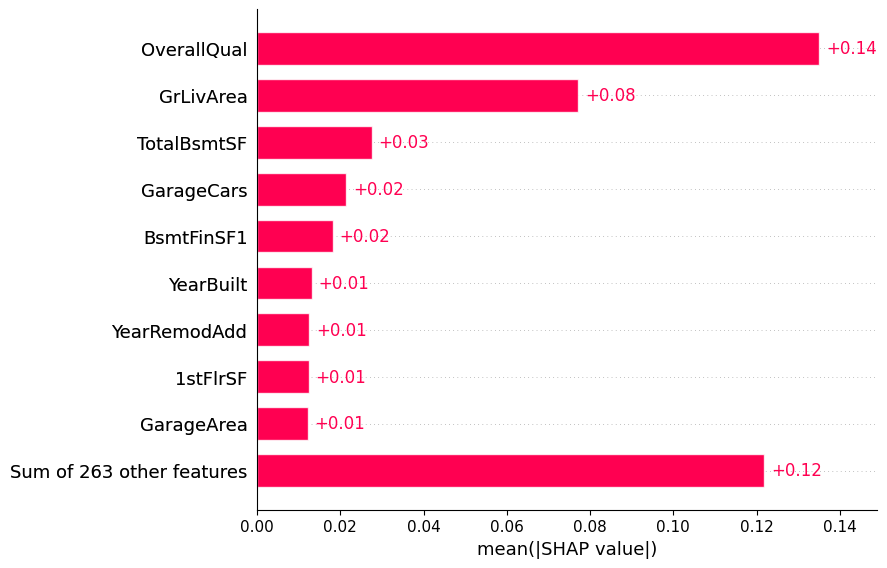

In [82]:
# Criar objeto SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plotar a importância das variáveis
shap.plots.bar(shap_values)

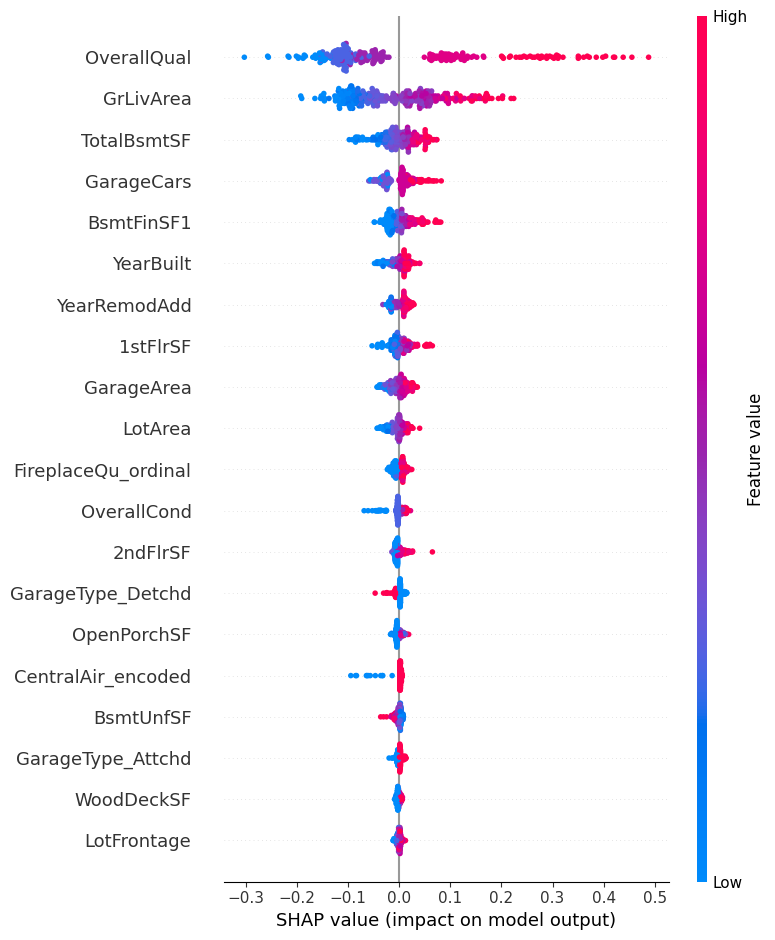

In [83]:
shap.summary_plot(shap_values, X_test)

In [84]:
# Calcular importância média absoluta dos valores SHAP
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Criar DataFrame com nome e importância
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': shap_importance
})

# Ordenar da mais importante para a menos importante
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Printar só os nomes das features mais importantes (ex: top 20)
print("Principais features que influenciam o preço da casa:")
print(importance_df['feature'].head(200).to_list())

Principais features que influenciam o preço da casa:
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GarageArea', 'LotArea', 'FireplaceQu_ordinal', 'OverallCond', '2ndFlrSF', 'GarageType_Detchd', 'OpenPorchSF', 'CentralAir_encoded', 'BsmtUnfSF', 'GarageType_Attchd', 'WoodDeckSF', 'LotFrontage', 'MSZoning_RM', 'GarageYrBlt', 'GarageFinish_Unf', 'KitchenQual_ordinal', 'BsmtQual_Gd', 'MoSold', 'BsmtQual_Ex', 'Fireplaces', 'BsmtFinType1_GLQ', 'MasVnrArea', 'BsmtFullBath', 'HeatingQC_ordinal', 'FullBath', 'MSSubClass_60', 'HalfBath', 'Foundation_PConc', 'BsmtExposure_No', 'GarageCond_ordinal', 'ExterQual_ordinal', 'GarageQual_ordinal', 'BsmtExposure_Gd', 'MSSubClass', 'TotRmsAbvGrd', 'BedroomAbvGr', 'MSZoning_RL', 'LotShape_Reg', 'Id', 'KitchenAbvGr', 'YrSold', 'EnclosedPorch', 'MSSubClass_30', 'BsmtQual_TA', 'ExterCond_ordinal', 'Functional_Typ', 'BsmtFinType1_Unf', 'LotShape_IR1', 'Exterior2nd_MetalSd', 'BsmtCond_TA', 'Neig

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

modelo = RandomForestRegressor(random_state=42)

# Espaço de busca mais amplo, mas com menos combinações testadas
param_dist = {
    'n_estimators': randint(50, 250),
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10,20, 15],
    'min_samples_leaf': [1, 2, 4, 5, 8],
    'max_features': ['sqrt', 'log2']
}

search = RandomizedSearchCV(
    modelo,
    param_distributions=param_dist,
    n_iter=20,  # Testa só 20 combinações aleatórias
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1  # Usa todos os núcleos do processador
)

search.fit(X_train, y_train)

print("Melhores parâmetros:", search.best_params_)
print("Melhor RMSE (negativo):", search.best_score_)

Melhores parâmetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 137}
Melhor RMSE (negativo): -0.14703838901518337


In [86]:
top_features = importance_df['feature'].head(200).to_list()
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

In [87]:
model_reduced = RandomForestRegressor(n_estimators=137, 
                                      random_state=42, 
                                      max_depth=None, 
                                      max_features='sqrt', 
                                      min_samples_leaf=1, 
                                      min_samples_split=2 )
model_reduced.fit(X_train_reduced, y_train)

,n_estimators,137
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Treine seu modelo
model.fit(X_train, y_train)

# Previsão
y_pred_log = model.predict(X_test)

# Converter previsões para escala original
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# Calcular RMSE na escala original
rmse = mean_squared_error(y_true, y_pred)
print(f'RMSE na escala original: {rmse:.4f}')

RMSE na escala original: 926574181.0825


In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_reduced, X_train_reduced, y_train, cv=5, scoring='r2')
print(f"R² médio: {scores.mean():.4f}")

R² médio: 0.8623


In [90]:
epsilon = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
print(f'MAPE (em %): {mape:.4f}')

MAPE (em %): 10.3567


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predição
y_pred = model.predict(X_test)

# R²
r2 = r2_score(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R²: 0.8859
RMSE: 0.15
MAE: 0.10


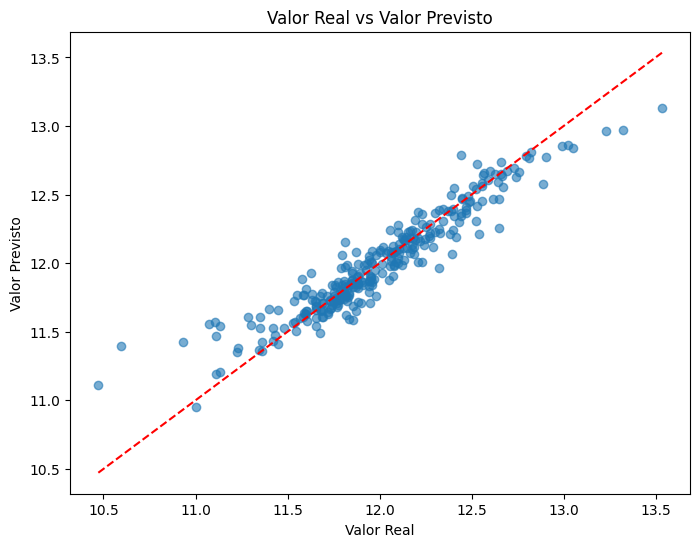

In [92]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha y=x
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Valor Real vs Valor Previsto')
plt.show()

### Avaliação